# A "Regular" Magnetic field Model
We can also use large scale coherent models for the magnetic field. One particular model that ships with the code is that used by [Libanov \& Troitsky (2021)](), which is originally described by [Gourgouliatos et al. (2010)]().  

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import alpro 
alpro.util.set_default_plot_params()

In [2]:
# load data from Marsh and Libanov codes

s = alpro.Survival("libanov")
s.setup_regular_model()

Let's plot the magnetic field components

Text(0.5, 0, '$z$ (kpc)')

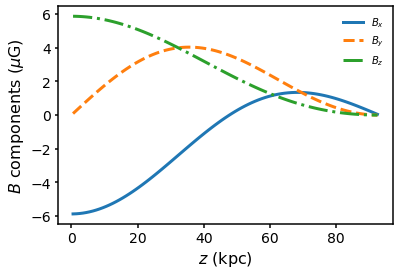

In [3]:
plt.plot(s.domain.rcen, 1e6 * s.domain.Bx, label = "$B_x$")
plt.plot(s.domain.rcen, 1e6 * s.domain.By, ls="--", label = "$B_y$")
plt.plot(s.domain.rcen, 1e6 * s.domain.Bz, ls="-.", label = "$B_z$")
plt.ylabel("$B$ components ($\mu$G)")
plt.legend(frameon=False)
plt.xlabel("$z$ (kpc)")

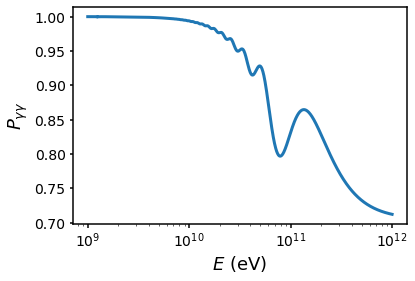

In [4]:
s.set_params(mass = 1e-8, g = 1e-11 * 1e-9)
energies = np.logspace(9,12,1000)
s.propagate(energies = energies)
fig = s.default_plot(mode = "survival")